In [2]:
import numpy as np
import numpy.random
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import KNN
import DecisionTrees
import RandomForest
import AdaBoost

# Perform k-Nearest Neighbours

In [ ]:
df = pd.read_csv('data_for_classification.csv')

Text(0, 0.5, 'x2')

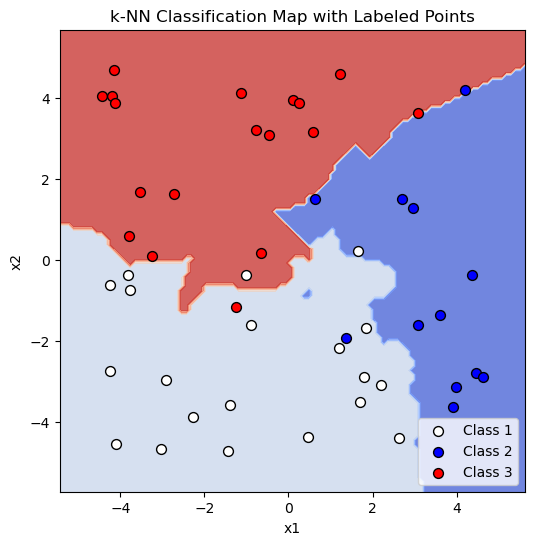

In [5]:
NUM_SAMPLES = 50
RESOLUTION = 100
NEIGHBOURS = 3

X = df[['X1','X2']].values[:NUM_SAMPLES,:]
y = df['Multi'].values[:NUM_SAMPLES]

# Create a grid of points to classify
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

# Predict labels for the grid points
grid_predictions = KNN.KNN(X, y, grid_points, neighbours=NEIGHBOURS)

ax.contourf(xx, yy, grid_predictions.reshape(xx.shape), alpha=0.8, cmap='coolwarm')

# Scatter plot for data points
ax.scatter(X[y == 1, 0], X[y == 1, 1], c='white', edgecolor='k', s=50, label='Class 1')
ax.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', edgecolor='k', s=50, label='Class 2')
ax.scatter(X[y == 2, 0], X[y == 2, 1], c='red', edgecolor='k', s=50, label='Class 3')

# Add a legend
ax.legend()

# Set title and axis labels
ax.set_title("k-NN Classification Map with Labeled Points")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

# Perform Decision Tree with missclassification error and gini impurity

Text(0, 0.5, 'x2')

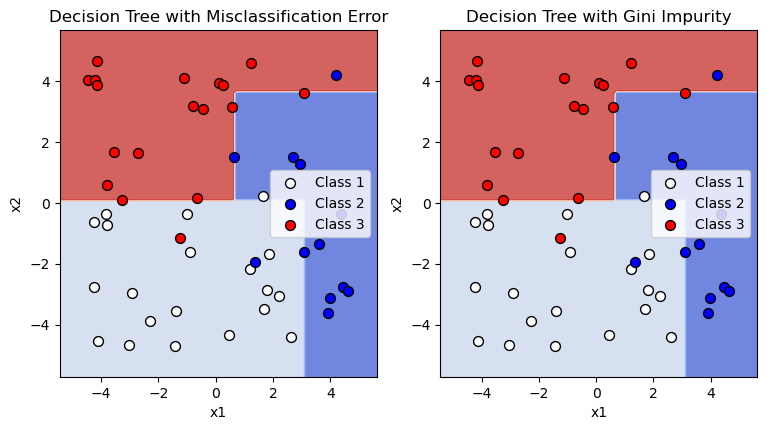

In [4]:
NUM_SAMPLES = 50
RESOLUTION = 100
MIN_SIZE = 3

# Predict labels for the grid points using decision tree with misclassification error
tree_miss = DecisionTrees.decision_tree_train(X, y, min_size = MIN_SIZE)
grid_predictions_miss = DecisionTrees.decision_tree_predict(tree_miss, grid_points)

# Predict labels for the grid points using decision tree with gini impurity
tree_gini = DecisionTrees.decision_tree_train(X, y,loss_func='gini impurity', min_size=MIN_SIZE)
grid_predictions_gini = DecisionTrees.decision_tree_predict(tree_gini, grid_points)

fig = plt.figure(figsize=(9, 4.5))
axs = fig.subplots(ncols=2)

# Plot the classification map with misclassfication error
axs[0].contourf(xx, yy, grid_predictions_miss.reshape(xx.shape), alpha=0.8, cmap='coolwarm')

# Scatter plot for data points
axs[0].scatter(X[y == 1, 0], X[y == 1, 1], c='white', edgecolor='k', s=50, label='Class 1')
axs[0].scatter(X[y == 0, 0], X[y == 0, 1], c='blue', edgecolor='k', s=50, label='Class 2')
axs[0].scatter(X[y == 2, 0], X[y == 2, 1], c='red', edgecolor='k', s=50, label='Class 3')

# Add a legend
axs[0].legend()

# Set title and axis labels
axs[0].set_title("Decision Tree with Misclassification Error")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")

# Plot the classification map with gini impurity
axs[1].contourf(xx, yy, grid_predictions_gini.reshape(xx.shape), alpha=0.8, cmap='coolwarm')

# Scatter plot for data points
axs[1].scatter(X[y == 1, 0], X[y == 1, 1], c='white', edgecolor='k', s=50, label='Class 1')
axs[1].scatter(X[y == 0, 0], X[y == 0, 1], c='blue', edgecolor='k', s=50, label='Class 2')
axs[1].scatter(X[y == 2, 0], X[y == 2, 1], c='red', edgecolor='k', s=50, label='Class 3')

# Add a legend
axs[1].legend()

# Set title and axis labels
axs[1].set_title("Decision Tree with Gini Impurity")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")


# Perform Random Forests

Text(0, 0.5, 'x2')

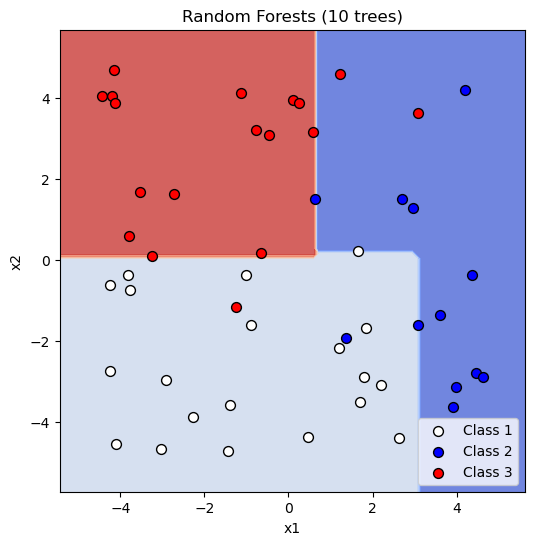

In [5]:
NUM_SAMPLES = 50
RESOLUTION = 100
NUM_TREES = 10

# Predict labels for the grid points
forest = RandomForest.random_forest_train(X, y, k=NUM_TREES)
grid_predictions = RandomForest.random_forest_predict(forest, grid_points)

# Plot the classification map
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

ax.contourf(xx, yy, grid_predictions.reshape(xx.shape), alpha=0.8, cmap='coolwarm')

# Scatter plot for data points
ax.scatter(X[y == 1, 0], X[y == 1, 1], c='white', edgecolor='k', s=50, label='Class 1')
ax.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', edgecolor='k', s=50, label='Class 2')
ax.scatter(X[y == 2, 0], X[y == 2, 1], c='red', edgecolor='k', s=50, label='Class 3')

# Add a legend
ax.legend()

# Set title and axis labels
ax.set_title("Random Forests (10 trees)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

# Perform AdaBoost


Text(0, 0.5, 'x2')

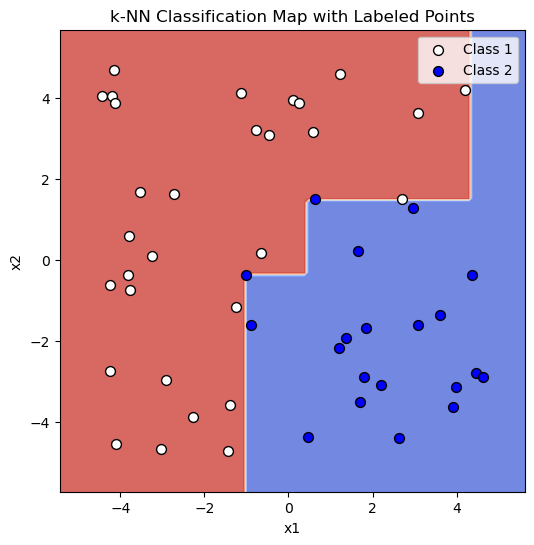

In [6]:
NUM_SAMPLES = 50
RESOLUTION = 100
NUM_TREES = 10

X = df[['X1','X2']].values[:NUM_SAMPLES,:]
y = df['Binary'].values[:NUM_SAMPLES]

# Create a grid of points to classify
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict labels for the grid points
trees, alphas = AdaBoost.adaboost_train(X, y, k=NUM_TREES)
grid_predictions = AdaBoost.adaboost_predict(trees, alphas, grid_points)

# Plot the classification map
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

ax.contourf(xx, yy, grid_predictions.reshape(xx.shape), alpha=0.8, cmap='coolwarm')

# Scatter plot for data points
ax.scatter(X[y == 1, 0], X[y == 1, 1], c='white', edgecolor='k', s=50, label='Class 1')
ax.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', edgecolor='k', s=50, label='Class 2')

# Add a legend
ax.legend()

# Set title and axis labels
ax.set_title("k-NN Classification Map with Labeled Points")
ax.set_xlabel("x1")
ax.set_ylabel("x2")